# Predicting Fraudulant Users for Ecommerce Website

# 1 - Data Exploraration

### Importing Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Fraud_Data = pd.read_csv('Fraud_Data.csv') #information about user and first transaction
Ip2Country = pd.read_csv('IpAddress_to_Country.csv') #information about user and first transaction

In [2]:
Fraud_Data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
Ip2Country.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


### Checking elementary properties of the datasets

In [4]:
print('Fraud_Data Data Exploration')
print('\n')
print('Checking rows and column number')
print(Fraud_Data.shape)
print('\n')
print('Checking data types')
print(Fraud_Data.dtypes)
print('\n')
print('Checking unique counts to identify repeat values')
print(Fraud_Data.nunique())

print('\n')
print('IpAddress_to_Country Data Exploration')
print('\n')
print('Checking rows and column number')
print(Ip2Country.shape)
print('\n')
print('Checking data types')
print(Ip2Country.dtypes)
print('\n')
print('Checking unique counts')
print(Ip2Country.nunique())
print('\n')
print('Checking sum of NaN values (if there are any)')
print(Fraud_Data.isna().sum())

Fraud_Data Data Exploration


Checking rows and column number
(151112, 11)


Checking data types
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object


Checking unique counts to identify repeat values
user_id           151112
signup_time       151112
purchase_time     150679
purchase_value       122
device_id         137956
source                 3
browser                5
sex                    2
age                   58
ip_address        143512
class                  2
dtype: int64


IpAddress_to_Country Data Exploration


Checking rows and column number
(138846, 3)


Checking data types
lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object


Checking unique counts
lower_bound_ip_

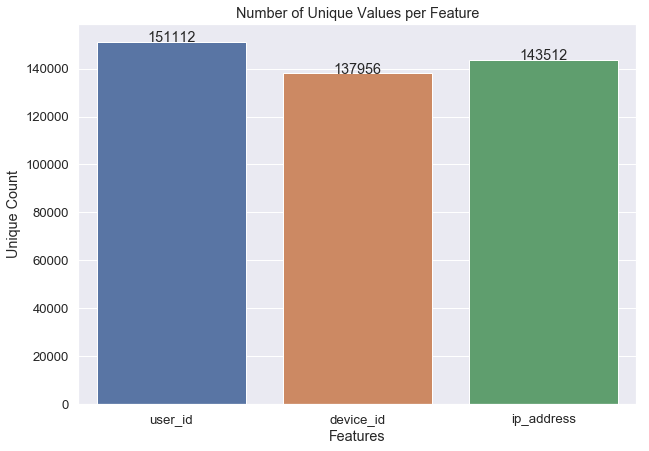

In [5]:
plt.figure(figsize=(10, 7))
cols=['user_id',
 'device_id',
 'ip_address']

uniques = [len(Fraud_Data[col].unique()) for col in cols]
sns.set(font_scale=1.2,  style="darkgrid")
ax = sns.barplot(cols, uniques)
ax.set(xlabel='Features', ylabel='Unique Count', title='Number of Unique Values per Feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height+20,
            uniq,
            ha="center")

#### Percentage of fraudulant Vs Non-fraudulant Data

No Frauds 90.64 % of the dataset
Frauds 9.36 % of the dataset


14151

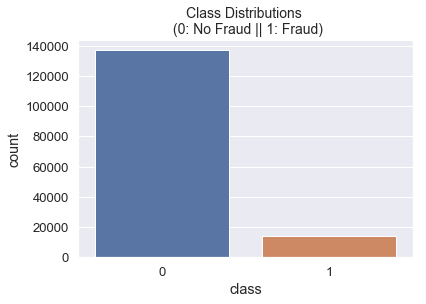

In [6]:
sns.countplot('class', data=Fraud_Data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
Fraud_Data['class'].value_counts()[1]
print('No Frauds', round(Fraud_Data['class'].value_counts()[0]/len(Fraud_Data) * 100,2), '% of the dataset')
print('Frauds', round(Fraud_Data['class'].value_counts()[1]/len(Fraud_Data) * 100,2), '% of the dataset')
Fraud_Data['class'].value_counts()[1]

## 2 - Data Cleaning

### Convert signup and purchase time from object to datetime

In [7]:
import datetime
Fraud_Data['signup_time'] = pd.to_datetime(Fraud_Data['signup_time'])
Fraud_Data['purchase_time'] = pd.to_datetime(Fraud_Data['purchase_time'])

### Checking incorrect values of ip_address

In [8]:
print(Ip2Country['lower_bound_ip_address'].min())
print(Ip2Country['upper_bound_ip_address'].max())

16777216.0
3758096383


In [9]:
#Classifying IP values outside range of IPs given in IpAddress_to_Country as Bad_flag = 1
Fraud_Data['Bad_IP_Flag'] = np.where((Fraud_Data['ip_address'] <= Ip2Country['upper_bound_ip_address'].max())
                                 & (Fraud_Data['ip_address'] >= Ip2Country['lower_bound_ip_address'].min())
                                 ,0,1)
Fraud_Data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Bad_IP_Flag
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,0


In [10]:
Fraud_Data.groupby(['Bad_IP_Flag']).size()

Bad_IP_Flag
0    131095
1     20017
dtype: int64

### Attempt to fix incorrect IPs by removing decimals in between

In [11]:
# Fraud_Data = Fraud_Data.sort_values('ip_address') #checking values of IP address separated by decimal
# Fraud_Data['ip_address'] = Fraud_Data['ip_address'].astype(str) #converting to str type
# #replacing decimal by blank to see if these IP matche to country
# Fraud_Data['ip_address'] = Fraud_Data['ip_address'].str.replace('.', '')
# Fraud_Data['ip_address'] = Fraud_Data['ip_address'].astype('float64') #converting back to float64 type

###   

# For each user, determine their country based on the numeric IP address

### Function to find_country based on given ip_address

In [12]:
def find_country(ip_address):       
    for i in range(len(Ip2Country)):
        if  Ip2Country.loc[i, 'lower_bound_ip_address'] <= ip_address <= Ip2Country.loc[i, 'upper_bound_ip_address']:
            country = Ip2Country.loc[i,'country']
            break
    return country

import time
start = time.time()
test_find_country = find_country(3758093311)
end = time.time()
print(test_find_country, end - start)

import time
start = time.time()
test_find_country = find_country(3758095871)
end = time.time()
print(test_find_country, end - start)

import time
start = time.time()
test_find_country = find_country(4.155831e+08)
end = time.time()
print(test_find_country, end - start)

import time
start = time.time()
try:
    test_find_country = find_country(11756666486748) #checking with bad ip with removed decimal
except:
    test_find_country = 'Error: Country Not Matched - Invalid IP_Address'
end = time.time()
print(test_find_country, end - start)

Hong Kong 2.7083089351654053
China 2.599191188812256
United States 0.03882718086242676
Error: Country Not Matched - Invalid IP_Address 2.6502950191497803


In [13]:
#Faster Binary Search Function to find IP
def find_country_binary_search(ip_address):
    lower = 0
    upper = len(Ip2Country)
    while lower < upper:
        i = lower+(upper - lower) // 2
        if  Ip2Country.loc[i, 'lower_bound_ip_address'] <= ip_address <= Ip2Country.loc[i, 'upper_bound_ip_address']:
            country_b = Ip2Country.loc[i,'country']
            break
        elif Ip2Country.loc[i, 'lower_bound_ip_address'] <= ip_address:
            lower = i
        else:
            upper = i
    return country_b

import time
start = time.time()
test_find_country = find_country_binary_search(3758093311)
end = time.time()
print(test_find_country, end - start)

import time
start = time.time()
test_find_country = find_country_binary_search(3758095871)
end = time.time()
print(test_find_country, end - start)

import time
start = time.time()
test_find_country = find_country_binary_search(4.155831e+08)
end = time.time()
print(test_find_country, end - start)

Hong Kong 0.0008771419525146484
China 0.0006642341613769531
United States 0.0004680156707763672


### Using row wise apply of  find_country function on dataframe - Failed attempt

In [14]:
# Fraud_Data['Country_Mapped'] = Fraud_Data.apply (lambda row: find_country(row['ip_address']), axis=1)


#when lambda function maps a function, it creates a copy.I checked the complexity- fo 10-10 sec, for 100-300 seconds 
#maybe it's creating copy of data set and becoming computationally complex (exponential cmplexity)

### Approximate (merge_asof) on Fraud_Data and IpAddress_to_Country data

In [15]:
# Creating ip_address = lower_bound_ip_address and then joining datasets like vlookup = True match in excel
Ip2Country['ip_address'] = Ip2Country['lower_bound_ip_address'].astype('float64')

# Adding dummy row in the end so that ip_address> upper bound doesn't match to last country (Australia)
Ip2Country.loc[138846] = [None,None,None,3758096383]

In [16]:
#same as approx match to the nearest country whos ip address is less than 

In [17]:
Ip2Country.tail()

,lower_bound_ip_address,upper_bound_ip_address,country,ip_address
138842,3.758093e+09,3.758094e+09,India,3.758093e+09
138843,3.758095e+09,3.758096e+09,China,3.758095e+09
138844,3.758096e+09,3.758096e+09,Singapore,3.758096e+09
138845,3.758096e+09,3.758096e+09,Australia,3.758096e+09
138846,NaN,NaN,NaN,3.758096e+09


In [18]:
Fraud_Data = Fraud_Data.sort_values('ip_address')
Ip2Country = Ip2Country.sort_values('ip_address')
# Using merge_asof function
final_data = pd.merge_asof(Fraud_Data, Ip2Country[['country','ip_address']], on='ip_address')
final_data = final_data.where((pd.notnull(final_data)), None) #replacing all unmatched values to null

In [19]:
final_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Bad_IP_Flag,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093.496895,0,1,None
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447.138961,0,1,None
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818.501505,0,1,None
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566.664867,0,1,None
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423.789042,0,1,None


In [20]:
#checking values other than None
test = final_data[final_data['country'].isna() != True]
test.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Bad_IP_Flag,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,0,Thailand


###   

# 3- Feature Engineering

### New Variable for repeat device ID and repeat ip address

In [21]:
# Repeat device ID
counts = final_data['device_id'].value_counts()
final_data['device_id_repeat_flag'] = np.where(final_data['device_id'].isin(counts.index[counts > 1]), 1, 0) 

# Repeat ip address
counts = final_data['ip_address'].value_counts()
final_data['ip_address_repeat_flag'] = np.where(final_data['ip_address'].isin(counts.index[counts > 1]), 1, 0)

### Create new df with country to fraud percentage mapping

In [22]:
Country_Fraud_Per = pd.DataFrame({'Country_Fraud_Per': final_data.groupby('country')['class'].sum()/ final_data.groupby('country').size()})

In [23]:
Country_Fraud_Per.head()

,Country_Fraud_Per
country,
Afghanistan,0.166667
Albania,0.000000
Algeria,0.106557
Angola,0.041667
Antigua and Barbuda,0.000000


In [24]:
len(Country_Fraud_Per)

181

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ce24ba8>]],
      dtype=object)

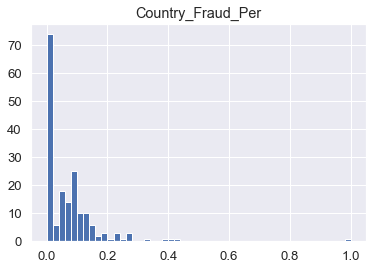

In [25]:
import matplotlib
%matplotlib inline

Country_Fraud_Per.hist(column='Country_Fraud_Per',bins = 50)

### Merge country wise percentage fraud to master data frame

In [26]:
final_data = pd.merge(final_data, Country_Fraud_Per, how='left', on='country')

In [27]:
#checking values other than None
test = final_data[final_data['country'].isna() != True]
test.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Bad_IP_Flag,country,device_id_repeat_flag,ip_address_repeat_flag,Country_Fraud_Per
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,0,Australia,0,0,0.089431
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,0,Thailand,0,0,0.065292
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,0,China,1,0,0.086642
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,0,China,0,0,0.086642
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,0,Thailand,0,0,0.065292


### Binning Countries into High and Low Risk if percentage fraud >= 20%

In [28]:
final_data['Country_Risk'] = np.where(final_data['Country_Fraud_Per'] >=0.2, 'High',
                                      np.where(final_data['Country_Fraud_Per']<0.2,'Low',None))

### Analyzing Age and creating age bins

In [29]:
final_data['age'].describe()

count    151112.000000
mean         33.140704
std           8.617733
min          18.000000
25%          27.000000
50%          33.000000
75%          39.000000
max          76.000000
Name: age, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1debbcf8>,
      dtype=object)

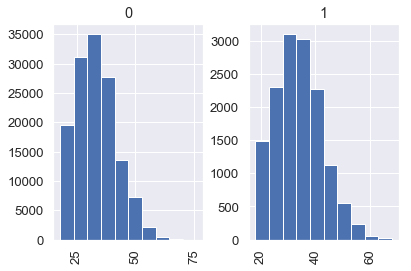

In [30]:
final_data['age'].hist(by=final_data['class'])

### Creating age buckets using pandas qcut -> assigning equal population to each bucket

In [31]:
final_data['age_bucket'] = pd.qcut(final_data['age'], 5, labels=False)

In [32]:
final_data.groupby(['age_bucket'])['age'].min()

age_bucket
0    18
1    26
2    31
3    36
4    41
Name: age, dtype: int64

In [33]:
# creating same age buckets and renaming them for better understanding
final_data['age_bucket'] = np.where(final_data['age'] >=41, 'E.40+',
                                      np.where(final_data['age'] >=36, 'D.36-40',
                                              np.where(final_data['age'] >=31, 'C.31-35',
                                                      np.where(final_data['age'] >=26, 'B.26-30',
                                                              np.where(final_data['age'] >=18, 'A.18-25',None)))))

In [34]:
final_data.groupby(['age_bucket']).size()
# population is approx equal as age is discrete and precise cuts not possible

age_bucket
A.18-25    31557
B.26-30    30433
C.31-35    32389
D.36-40    26611
E.40+      30122
dtype: int64

### Evaluating difference in purchase time and sign up time

In [35]:
final_data['signup_time'] =  pd.to_datetime(final_data['signup_time'], format= '%Y-%m-%d %H:%M:%S')
final_data['purchase_time'] =  pd.to_datetime(final_data['purchase_time'], format= '%Y-%m-%d %H:%M:%S')


In [36]:
final_data['Time_delta'] = (final_data['purchase_time'] - final_data['signup_time']).astype('timedelta64[h]')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cad0748>,
      dtype=object)

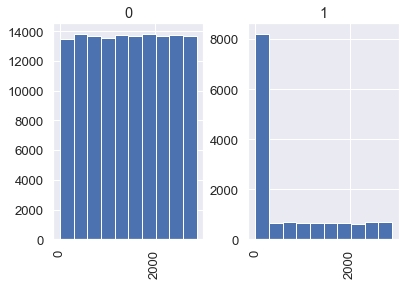

In [37]:
final_data['Time_delta'].hist(by=final_data['class'])

In [38]:
final_data['Same_Day_Purchase'] = np.where(final_data['Time_delta'] <= 24, 1, 0)

### Checking target variable split on these new variables

In [39]:
final_data.groupby(['device_id_repeat_flag'])['class'].sum()

device_id_repeat_flag
0     4010
1    10141
Name: class, dtype: int64

In [40]:
final_data.groupby(['Same_Day_Purchase'])['class'].sum()

Same_Day_Purchase
0    6499
1    7652
Name: class, dtype: int64

In [41]:
final_data.groupby(['ip_address_repeat_flag'])['class'].sum()

ip_address_repeat_flag
0    6517
1    7634
Name: class, dtype: int64

In [42]:
final_data.groupby(['Country_Risk'])['class'].sum()

Country_Risk
High      296
Low     12184
Name: class, dtype: int64

In [43]:
final_data.groupby(['age_bucket'])['class'].sum()

age_bucket
A.18-25    2852
B.26-30    2702
C.31-35    3136
D.36-40    2659
E.40+      2802
Name: class, dtype: int64

In [44]:
final_data.groupby(['Bad_IP_Flag'])['class'].sum()

Bad_IP_Flag
0    12480
1     1671
Name: class, dtype: int64

In [45]:
final_data['purchase_value'].describe()

count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64

### Finally checking the correlation of all the features

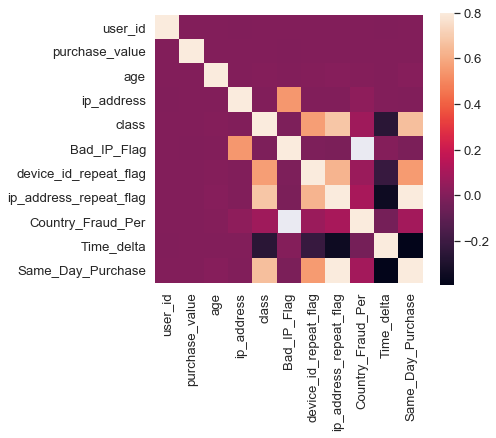

In [46]:
correlation_matrix = final_data.corr()

fig = plt.figure(figsize=(6,5))

sns.heatmap(correlation_matrix,vmax=0.8,square = True)

plt.show()

###   

# 4- Model Building

### Dummy variable creation

In [47]:
# separate target variable from dataset
y = final_data['class']
X = final_data.drop('class',axis = 1)

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 19 columns):
user_id                   151112 non-null int64
signup_time               151112 non-null datetime64[ns]
purchase_time             151112 non-null datetime64[ns]
purchase_value            151112 non-null int64
device_id                 151112 non-null object
source                    151112 non-null object
browser                   151112 non-null object
sex                       151112 non-null object
age                       151112 non-null int64
ip_address                151112 non-null float64
Bad_IP_Flag               151112 non-null int64
country                   131095 non-null object
device_id_repeat_flag     151112 non-null int64
ip_address_repeat_flag    151112 non-null int64
Country_Fraud_Per         131095 non-null float64
Country_Risk              131095 non-null object
age_bucket                151112 non-null object
Time_delta                151112 non-null fl

#### Creating dummy for X Categorical data

In [49]:
source = pd.get_dummies(X['source'],drop_first=True)
browser = pd.get_dummies(X['browser'],drop_first=True)
sex = pd.get_dummies(X['sex'],drop_first=True)
Country_Risk = pd.get_dummies(X['Country_Risk'],drop_first=True)
age_bucket = pd.get_dummies(X['age_bucket'],drop_first=True)

In [50]:
X.drop(['user_id','signup_time','purchase_time','device_id',
              'source','browser','sex',
              'age','ip_address','country',
              'Country_Fraud_Per',
              'Country_Risk','age_bucket',
              'Time_delta']
             ,axis=1,inplace=True)

In [51]:
X.head()

,purchase_value,Bad_IP_Flag,device_id_repeat_flag,ip_address_repeat_flag,Same_Day_Purchase
0,46,1,0,0,0
1,33,1,0,0,0
2,33,1,0,0,0
3,33,1,0,0,0
4,55,1,0,0,0


In [52]:
X = pd.concat([X,source,browser,sex,Country_Risk,age_bucket],axis=1)

In [53]:
X.head()

,purchase_value,Bad_IP_Flag,device_id_repeat_flag,ip_address_repeat_flag,Same_Day_Purchase,Direct,SEO,FireFox,IE,Opera,Safari,M,Low,B.26-30,C.31-35,D.36-40,E.40+
0,46,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
1,33,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,33,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
3,33,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,55,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0


### StratifiedShuffleSplit-
### Train Test Split- Having same proportion on target variable in Train and Test

In [54]:
# Stratified Split of train and test data
from sklearn.model_selection import StratifiedShuffleSplit
#sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
print(sss.get_n_splits(X, y))
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
print(y_train.value_counts())
print(y_test.value_counts())

1
0    102721
1     10613
Name: class, dtype: int64
0    34240
1     3538
Name: class, dtype: int64


### Functionalize Model Performance Evaluation

In [55]:
import itertools
from sklearn.metrics import roc_auc_score
def model_performance_metrics(model, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    if model.classes_[0] == 1:
       
        cm = np.array([[cm[1,1], cm[1,0]], [cm[0,1], cm[0,0]]])
     
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    

    title = 'Confusion Matrix'
    classes = ['No Fraud', 'Fraud', ]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    Precision = tp/(tp+fp)
    Recall =tp/(tp+fn)
    roc =roc_auc_score(y_test, y_pred)
    return_values = ['AUROC score= {0:.2f}'.format(roc),
                     'Precision (Pre) = {0:.2%}'.format(tp/(tp+fp)),
                     'Recall (TPR) = {0:.2%}'.format(tp/(tp+fn)),
                     'Fallout (FPR) = {0:.2%}'.format(fp/(fp+tn)),
                     'Accuracy (Acc) = {0:.2%}'.format((tp+tn)/(tp+tn+fp+fn)),
                     'F1 score = {0:.2%}'.format(2*Precision*Recall/(Precision+Recall))]

    return return_values

###   

## Model 1- Logistic Regression

['AUROC score= 0.77',
 'Precision (Pre) = 93.05%',
 'Recall (TPR) = 53.70%',
 'Fallout (FPR) = 0.41%',
 'Accuracy (Acc) = 95.29%',
 'F1 score = 68.10%']

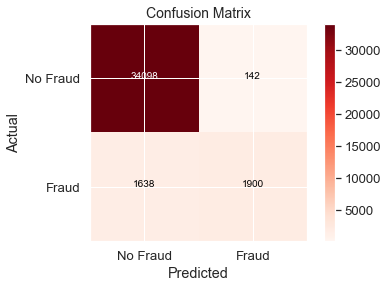

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
lrn = LogisticRegression()
lrn.fit(X_train, y_train)
y_pred = lrn.predict(X_test)

model_performance_metrics(lrn, y_test, y_pred)

### Over Sampling Fraud class in X_train

In [57]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

In [58]:
# SMOTE
sampler = SMOTE(ratio={1: 102721, 0: 102721},random_state=0)
X_rs, y_rs = sampler.fit_sample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_rs))

Original dataset shape Counter({0: 102721, 1: 10613})
Resampled dataset shape Counter({0: 102721, 1: 102721})


### Logistic Model on oversampled X_train

['AUROC score= 0.80',
 'Precision (Pre) = 44.27%',
 'Recall (TPR) = 68.29%',
 'Fallout (FPR) = 8.88%',
 'Accuracy (Acc) = 88.98%',
 'F1 score = 53.71%']

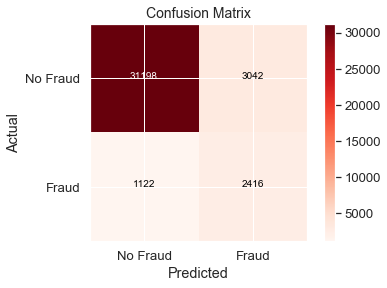

In [59]:
lrn = LogisticRegression()
lrn.fit(X_rs, y_rs)
y_pred = lrn.predict(X_test)

model_performance_metrics(lrn, y_test, y_pred)

### Logistic Model on oversampled X_train with Threshold value set to 0.4

['AUROC score= 0.79',
 'Precision (Pre) = 33.51%',
 'Recall (TPR) = 73.18%',
 'Fallout (FPR) = 15.01%',
 'Accuracy (Acc) = 83.89%',
 'F1 score = 45.97%']

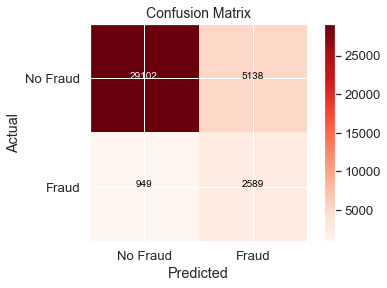

In [60]:
lrn = LogisticRegression()
lrn.fit(X_rs, y_rs)

THRESHOLD = 0.4
y_pred = np.where(lrn.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

model_performance_metrics(lrn, y_test, y_pred)

###   

## Model 2- KNN

['AUROC score= 0.77',
 'Precision (Pre) = 91.41%',
 'Recall (TPR) = 53.84%',
 'Fallout (FPR) = 0.52%',
 'Accuracy (Acc) = 95.20%',
 'F1 score = 67.77%']

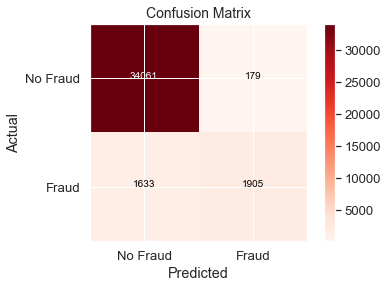

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
model_performance_metrics(knn, y_test, y_pred)

### KNN on oversampled X_train

['AUROC score= 0.75',
 'Precision (Pre) = 30.76%',
 'Recall (TPR) = 65.55%',
 'Fallout (FPR) = 15.24%',
 'Accuracy (Acc) = 82.96%',
 'F1 score = 41.87%']

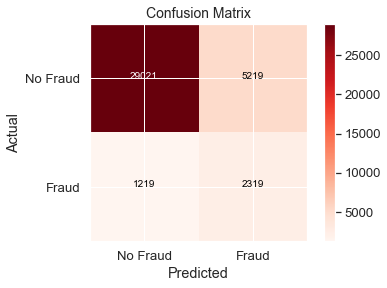

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_rs, y_rs)
y_pred = knn.predict(X_test)
model_performance_metrics(knn, y_test, y_pred)

### KNN on oversampled X_train with Threshold value set to 0.4

['AUROC score= 0.71',
 'Precision (Pre) = 18.71%',
 'Recall (TPR) = 75.35%',
 'Fallout (FPR) = 33.84%',
 'Accuracy (Acc) = 67.02%',
 'F1 score = 29.97%']

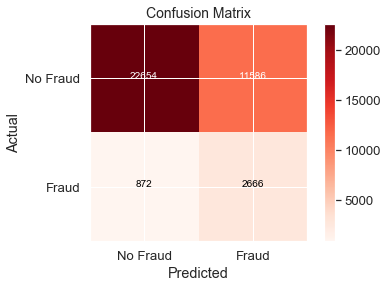

In [63]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_rs, y_rs) #fitting on oversamples X_train

THRESHOLD = 0.40
y_pred = np.where(knn.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

model_performance_metrics(knn, y_test, y_pred)

###   

## Model 3- Decision Tree

['AUROC score= 0.78',
 'Precision (Pre) = 79.55%',
 'Recall (TPR) = 57.38%',
 'Fallout (FPR) = 1.52%',
 'Accuracy (Acc) = 94.63%',
 'F1 score = 66.67%']

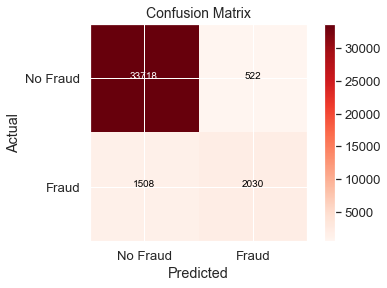

In [64]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_performance_metrics(clf, y_test, y_pred)

### Decision Tree on oversampled X_train

['AUROC score= 0.75',
 'Precision (Pre) = 33.55%',
 'Recall (TPR) = 63.62%',
 'Fallout (FPR) = 13.02%',
 'Accuracy (Acc) = 84.79%',
 'F1 score = 43.93%']

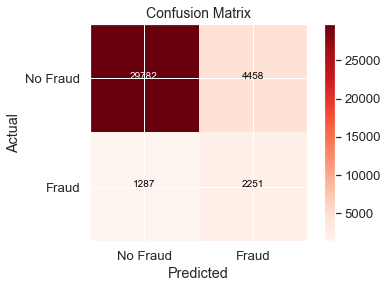

In [65]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_rs, y_rs) #fitting on oversamples X_train
y_pred = clf.predict(X_test)
model_performance_metrics(clf, y_test, y_pred)

### Decision Tree on oversampled X_train with Threshold value set to 0.4

['AUROC score= 0.73',
 'Precision (Pre) = 25.60%',
 'Recall (TPR) = 66.68%',
 'Fallout (FPR) = 20.02%',
 'Accuracy (Acc) = 78.73%',
 'F1 score = 37.00%']

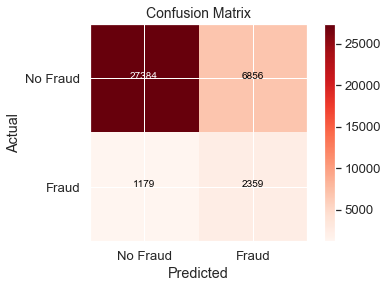

In [66]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_rs, y_rs) #fitting on oversamples X_train

THRESHOLD = 0.40
y_pred = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

model_performance_metrics(clf, y_test, y_pred)

###   

## Model 4- LDA

['AUROC score= 0.77',
 'Precision (Pre) = 89.72%',
 'Recall (TPR) = 53.79%',
 'Fallout (FPR) = 0.64%',
 'Accuracy (Acc) = 95.10%',
 'F1 score = 67.26%']

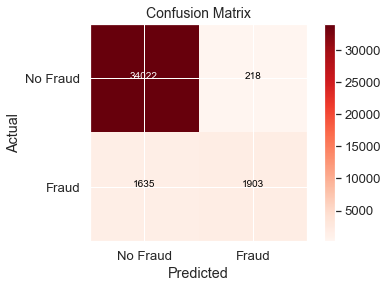

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
model_performance_metrics(lda, y_test, y_pred)

### LDA on oversampled X_train

['AUROC score= 0.82',
 'Precision (Pre) = 51.60%',
 'Recall (TPR) = 71.09%',
 'Fallout (FPR) = 6.89%',
 'Accuracy (Acc) = 91.05%',
 'F1 score = 59.80%']

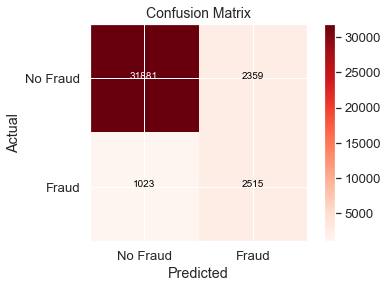

In [68]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_rs, y_rs) #fitting on oversamples X_train

y_pred = lda.predict(X_test)
model_performance_metrics(lda, y_test, y_pred)

### LDA on oversampled X_train with Threshold value set to 0.40

['AUROC score= 0.82',
 'Precision (Pre) = 46.88%',
 'Recall (TPR) = 71.93%',
 'Fallout (FPR) = 8.42%',
 'Accuracy (Acc) = 89.74%',
 'F1 score = 56.76%']

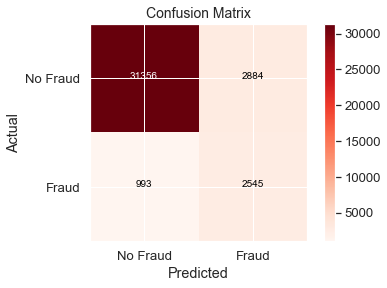

In [69]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_rs, y_rs) #fitting on oversamples X_train

THRESHOLD = 0.4
y_pred = np.where(lda.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

model_performance_metrics(clf, y_test, y_pred)

###   

## Model 5- XGboost

['AUROC score= 0.77',
 'Precision (Pre) = 99.01%',
 'Recall (TPR) = 53.76%',
 'Fallout (FPR) = 0.06%',
 'Accuracy (Acc) = 95.62%',
 'F1 score = 69.68%']

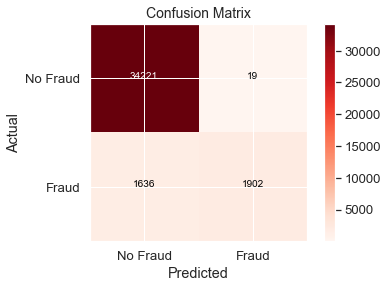

In [70]:
import xgboost as xgb
gbm= xgb.XGBClassifier(max_depth=10, n_estimators=300, learning_rate=0.01).fit(X_train, y_train)

y_pred = gbm.predict(X_test)
model_performance_metrics(gbm, y_test, y_pred)

### XGboost on oversampled X_train

['AUROC score= 0.80',
 'Precision (Pre) = 58.63%',
 'Recall (TPR) = 65.66%',
 'Fallout (FPR) = 4.79%',
 'Accuracy (Acc) = 92.45%',
 'F1 score = 61.95%']

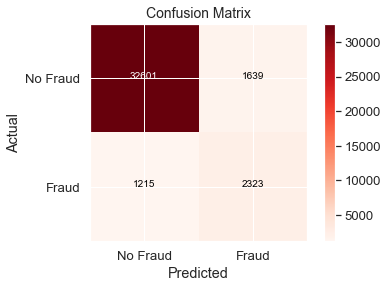

In [71]:
gbm= xgb.XGBClassifier(max_depth=10, n_estimators=300, learning_rate=0.01).fit(X_rs, y_rs)

y_pred = gbm.predict(X_test.values)
model_performance_metrics(gbm, y_test, y_pred)

### XGboost on oversampled X_train with Threshold value set to 0.39

['AUROC score= 0.79',
 'Precision (Pre) = 36.01%',
 'Recall (TPR) = 70.01%',
 'Fallout (FPR) = 12.85%',
 'Accuracy (Acc) = 85.54%',
 'F1 score = 47.56%']

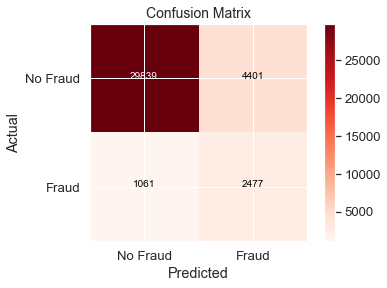

In [72]:
THRESHOLD = 0.39
y_pred = np.where(gbm.predict_proba(X_test.values)[:,1] > THRESHOLD, 1, 0)
model_performance_metrics(gbm, y_test, y_pred)

###   

## Selecting Best Model and Improving Performance

### Model Summary - Logistic Regression

In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
lrn = sm.GLM(y_train, X_train).fit()
lrn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  class   No. Observations:               113334
Model:                            GLM   Df Residuals:                   113317
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                        0.041391
Method:                          IRLS   Log-Likelihood:                 19662.
Date:                Fri, 22 Mar 2019   Deviance:                       4690.3
Time:                        21:59:49   Pearson chi2:                 4.69e+03
No. Iterations:                     3   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
purchase_value         -3.543e-07   3.25e-05     -0.011      0.991   -6.41e-05    6.34e-05
Bad_IP_Flag                0.0214      0.003      8.152      0.000       0.016       0.026
device_id_repeat_flag      0.1985      0.002     85.107      0.000       0.194       0.203
ip_address_repeat_flag     0.3551      0.006     59.992      0.000       0.344       0.367
Same_Day_Purchase          0.3626      0.005     67.243      0.000       0.352       0.373
Direct                     0.0117      0.002      7.096      0.000       0.008       0.015
SEO                        0.0005      0.001      0.357      0.721      -0.002       0.003
FireFox                    0.0004      0.002      0.240      0.810      -0.003       0.004
IE                         0.0004      0.002      0.281      0.779      -0.003       0.003
Opera                     -0.0016      0.004     -0.390      0.696      -0.009       0.006
Safari                     0.0002      0.002      0.100      0.921      -0.003       0.004
M                          0.0015      0.001      1.269      0.204      -0.001       0.004
Low                        0.0232      0.002     10.877      0.000       0.019       0.027
B.26-30                    0.0013      0.002      0.711      0.477      -0.002       0.005
C.31-35                 6.209e-05      0.002      0.034      0.973      -0.004       0.004
D.36-40                    0.0017      0.002      0.864      0.388      -0.002       0.005
E.40+                     -0.0003      0.002     -0.135      0.893      -0.004       0.003
==========================================================================================
"""

### Our Orginal Logistic Regression Model

['AUROC score= 0.79',
 'Precision (Pre) = 33.67%',
 'Recall (TPR) = 73.01%',
 'Fallout (FPR) = 14.86%',
 'Accuracy (Acc) = 84.00%',
 'F1 score = 46.09%']

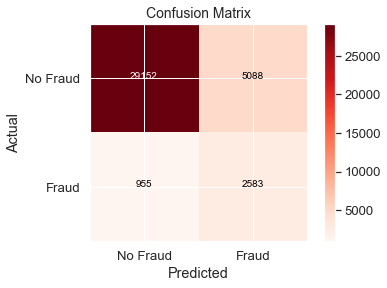

In [74]:
lrn = LogisticRegression(solver = 'lbfgs') #default solver lbfgs
lrn.fit(X_rs, y_rs)

THRESHOLD = 0.4
y_pred = np.where(lrn.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

model_performance_metrics(lrn, y_test, y_pred)

### Adding L2 (Ridge Penalty) to Logistic Regression Model and Using 'sag' solver

['AUROC score= 0.79',
 'Precision (Pre) = 33.48%',
 'Recall (TPR) = 73.21%',
 'Fallout (FPR) = 15.03%',
 'Accuracy (Acc) = 83.87%',
 'F1 score = 45.95%']

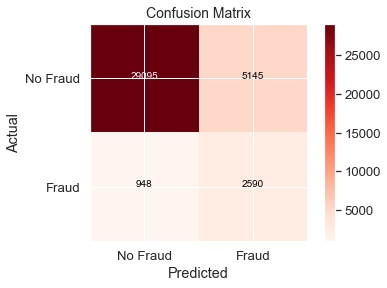

In [75]:
lrn = LogisticRegression(penalty='l2',solver='sag')
lrn.fit(X_rs, y_rs)

THRESHOLD = 0.4
y_pred = np.where(lrn.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

model_performance_metrics(lrn, y_test, y_pred)

### Adding L2 (Ridge Penalty) to Logistic Regression Model and Using 'newton-cg' solver

['AUROC score= 0.79',
 'Precision (Pre) = 33.49%',
 'Recall (TPR) = 73.18%',
 'Fallout (FPR) = 15.02%',
 'Accuracy (Acc) = 83.88%',
 'F1 score = 45.95%']

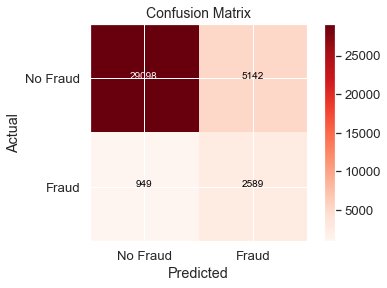

In [76]:
lrn = LogisticRegression(penalty='l2',solver='newton-cg')
lrn.fit(X_rs, y_rs)

THRESHOLD = 0.4
y_pred = np.where(lrn.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

model_performance_metrics(lrn, y_test, y_pred)

### Adding L2 (Ridge Penalty) to Logistic Regression Model and Using 'liblinear' solver

['AUROC score= 0.79',
 'Precision (Pre) = 33.51%',
 'Recall (TPR) = 73.18%',
 'Fallout (FPR) = 15.01%',
 'Accuracy (Acc) = 83.89%',
 'F1 score = 45.97%']

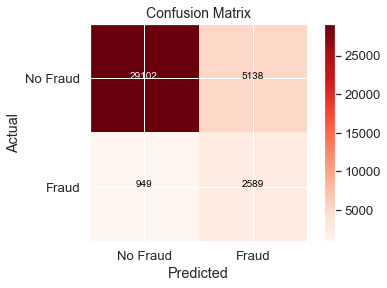

In [77]:
lrn = LogisticRegression(penalty='l2',solver='liblinear')
lrn.fit(X_rs, y_rs)

THRESHOLD = 0.4
y_pred = np.where(lrn.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

model_performance_metrics(lrn, y_test, y_pred)


### Adding L2 (Ridge Penalty) to Logistic Regression Model and Using 'saga' solver

['AUROC score= 0.79',
 'Precision (Pre) = 33.57%',
 'Recall (TPR) = 73.35%',
 'Fallout (FPR) = 14.99%',
 'Accuracy (Acc) = 83.91%',
 'F1 score = 46.06%']

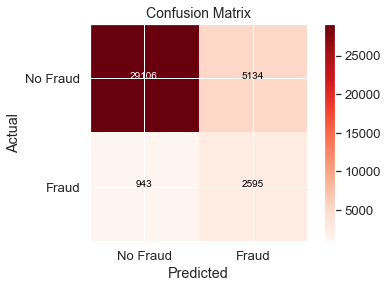

In [78]:
lrn = LogisticRegression(penalty='l2',solver='saga')
lrn.fit(X_rs, y_rs)

THRESHOLD = 0.4
y_pred = np.where(lrn.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

model_performance_metrics(lrn, y_test, y_pred)

### Adding L1 (Lasso Penalty) to Logistic Regression Model and Using 'liblinear' solver

['AUROC score= 0.79',
 'Precision (Pre) = 33.51%',
 'Recall (TPR) = 73.18%',
 'Fallout (FPR) = 15.01%',
 'Accuracy (Acc) = 83.89%',
 'F1 score = 45.97%']

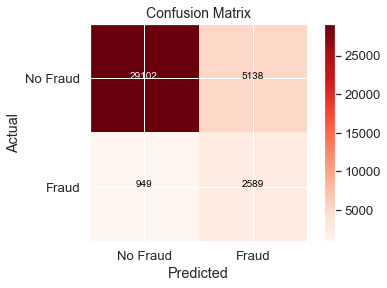

In [79]:
lrn = LogisticRegression(penalty='l1',solver='liblinear')
lrn.fit(X_rs, y_rs)

THRESHOLD = 0.4
y_pred = np.where(lrn.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

model_performance_metrics(lrn, y_test, y_pred)

### Adding L1 (Lasso Penalty) to Logistic Regression Model and Using 'saga' solver

lrn = LogisticRegression(penalty='l1',solver='saga')
lrn.fit(X_rs, y_rs)

THRESHOLD = 0.4
y_pred = np.where(lrn.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

model_performance_metrics(lrn, y_test, y_pred)

### Best Model = L2 Penalty and 'saga' solver (Highest TPR)

## Way forward

### 1- Improve model performance
### 2- Try other models like random forest
### 3- Evaluate feature importance and summarize final variables to use

## Post Mid-Term scratch work

In [80]:
#test = final_data['ip_address_repeat_flag']=1

#checking values other than None
test = final_data[final_data['device_id_repeat_flag'] == 1]
test

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Bad_IP_Flag,country,device_id_repeat_flag,ip_address_repeat_flag,Country_Fraud_Per,Country_Risk,age_bucket,Time_delta,Same_Day_Purchase
41,189778,2015-05-20 11:14:34,2015-06-09 21:10:25,36,UCMYUQFHXXHEO,Ads,FireFox,M,31,1.278431e+06,0,1,None,1,0,NaN,None,C.31-35,489.0,0
49,277524,2015-07-21 00:42:01,2015-11-09 05:08:13,72,QAIQAXBOKWWYG,Ads,IE,F,24,1.617889e+06,0,1,None,1,0,NaN,None,A.18-25,2668.0,0
59,85599,2015-04-12 01:39:53,2015-05-26 20:50:53,16,UMJXEBLNCNXDG,Ads,Chrome,F,30,1.865238e+06,0,1,None,1,0,NaN,None,B.26-30,1075.0,0
65,120020,2015-04-01 07:18:13,2015-07-18 03:36:51,24,NTNHHPUOEFYTD,Ads,Chrome,M,29,2.184848e+06,0,1,None,1,0,NaN,None,B.26-30,2588.0,0
68,363461,2015-01-07 20:53:47,2015-01-07 20:53:48,26,FBHIRVGVKKWAI,Ads,IE,F,36,2.278096e+06,1,1,None,1,1,NaN,None,D.36-40,0.0,1
69,221950,2015-01-07 20:53:51,2015-01-07 20:53:52,26,FBHIRVGVKKWAI,Ads,IE,F,36,2.278096e+06,1,1,None,1,1,NaN,None,D.36-40,0.0,1
70,125058,2015-01-07 20:53:50,2015-01-07 20:53:51,26,FBHIRVGVKKWAI,Ads,IE,F,36,2.278096e+06,1,1,None,1,1,NaN,None,D.36-40,0.0,1
71,379555,2015-01-07 20:53:43,2015-01-07 20:53:44,26,FBHIRVGVKKWAI,Ads,IE,F,36,2.278096e+06,1,1,None,1,1,NaN,None,D.36-40,0.0,1
72,119377,2015-01-07 20:53:38,2015-01-07 20:53:39,26,FBHIRVGVKKWAI,Ads,IE,F,36,2.278096e+06,1,1,None,1,1,NaN,None,D.36-40,0.0,1
73,41846,2015-01-07 20:53:46,2015-01-07 20:53:47,26,FBHIRVGVKKWAI,Ads,IE,F,36,2.278096e+06,1,1,None,1,1,NaN,None,D.36-40,0.0,1


In [81]:
test_fraud = final_data[final_data['class'] == 1]
test_fraud.sort_values('Time_delta')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Bad_IP_Flag,country,device_id_repeat_flag,ip_address_repeat_flag,Country_Fraud_Per,Country_Risk,age_bucket,Time_delta,Same_Day_Purchase
68,363461,2015-01-07 20:53:47,2015-01-07 20:53:48,26,FBHIRVGVKKWAI,Ads,IE,F,36,2.278096e+06,1,1,None,1,1,NaN,None,D.36-40,0.0,1
85522,307498,2015-01-10 17:58:34,2015-01-10 17:58:35,77,POEPUWBVHBKEH,SEO,Chrome,M,35,2.431182e+09,1,0,United States,1,1,0.096265,Low,C.31-35,0.0,1
85523,387359,2015-01-10 17:58:24,2015-01-10 17:58:25,77,POEPUWBVHBKEH,SEO,Chrome,M,35,2.431182e+09,1,0,United States,1,1,0.096265,Low,C.31-35,0.0,1
85524,135322,2015-01-10 17:58:32,2015-01-10 17:58:33,77,POEPUWBVHBKEH,SEO,Chrome,M,35,2.431182e+09,1,0,United States,1,1,0.096265,Low,C.31-35,0.0,1
85526,44660,2015-01-10 17:58:33,2015-01-10 17:58:34,77,POEPUWBVHBKEH,SEO,Chrome,M,35,2.431182e+09,1,0,United States,1,1,0.096265,Low,C.31-35,0.0,1
85527,61514,2015-01-10 17:58:28,2015-01-10 17:58:29,77,POEPUWBVHBKEH,SEO,Chrome,M,35,2.431182e+09,1,0,United States,1,1,0.096265,Low,C.31-35,0.0,1
85528,308479,2015-01-10 17:58:31,2015-01-10 17:58:32,77,POEPUWBVHBKEH,SEO,Chrome,M,35,2.431182e+09,1,0,United States,1,1,0.096265,Low,C.31-35,0.0,1
85529,213117,2015-01-10 17:58:25,2015-01-10 17:58:26,77,POEPUWBVHBKEH,SEO,Chrome,M,35,2.431182e+09,1,0,United States,1,1,0.096265,Low,C.31-35,0.0,1
85530,281915,2015-01-10 17:58:27,2015-01-10 17:58:28,77,POEPUWBVHBKEH,SEO,Chrome,M,35,2.431182e+09,1,0,United States,1,1,0.096265,Low,C.31-35,0.0,1
85531,1744,2015-01-10 17:58:36,2015-01-10 17:58:37,77,POEPUWBVHBKEH,SEO,Chrome,M,35,2.431182e+09,1,0,United States,1,1,0.096265,Low,C.31-35,0.0,1


In [82]:
test_fraud['Time_delta_Fraud'] = (test_fraud['purchase_time'] - test_fraud['signup_time']).astype('timedelta64[s]')

In [83]:
pd.set_option('display.max_columns', None) 

In [84]:
test2= test_fraud[test_fraud['purchase_value']==0]
test2

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Bad_IP_Flag,country,device_id_repeat_flag,ip_address_repeat_flag,Country_Fraud_Per,Country_Risk,age_bucket,Time_delta,Same_Day_Purchase,Time_delta_Fraud


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a245b9550>]],
      dtype=object)

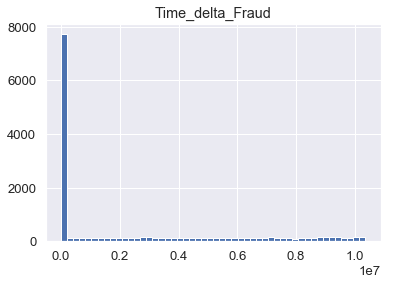

In [85]:
test_fraud.hist(column='Time_delta_Fraud',bins = 50)

In [86]:
print('Checking unique counts to identify repeat values')
print(X_train.nunique())

Checking unique counts to identify repeat values
purchase_value            120
Bad_IP_Flag                 2
device_id_repeat_flag       2
ip_address_repeat_flag      2
Same_Day_Purchase           2
Direct                      2
SEO                         2
FireFox                     2
IE                          2
Opera                       2
Safari                      2
M                           2
Low                         2
B.26-30                     2
C.31-35                     2
D.36-40                     2
E.40+                       2
dtype: int64


In [87]:
X_rs_df = pd.DataFrame.from_records(X_rs)

In [88]:
print('Checking unique counts to identify repeat values')
print(X_rs_df.nunique())

Checking unique counts to identify repeat values
0     120
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
dtype: int64
